<a href="https://colab.research.google.com/github/Rakeshgg2002/Imarticus-project-/blob/main/Kmeans_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip '/content/165899043568760ec2379f8793842aa5b168a_.zip'

Archive:  /content/165899043568760ec2379f8793842aa5b168a_.zip
   creating: 2 Project-K-means clustering/2 Project/
   creating: 2 Project-K-means clustering/2 Project/K-means/
   creating: 2 Project-K-means clustering/2 Project/K-means/Dataset/
  inflating: 2 Project-K-means clustering/2 Project/K-means/Dataset/cust_data.xlsx  
   creating: 2 Project-K-means clustering/2 Project/K-means/Problem Statement/
  inflating: 2 Project-K-means clustering/2 Project/K-means/Problem Statement/Problem_Statement_Kmeans.pdf  


Import the neccessary packages

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans

In [6]:
df=pd.read_excel('/content/2 Project-K-means clustering/2 Project/K-means/Dataset/cust_data.xlsx')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [7]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [11]:
df.skew()

<ipython-input-11-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Cust_ID                    0.000000
Orders                     0.368301
Jordan                     6.043441
Gatorade                   4.511717
Samsung                    7.758319
Asus                       7.665655
Udis                       7.510677
Mondelez International    11.736478
Wrangler                   6.995250
Vans                       8.805508
Fila                       9.860464
Brooks                     5.948787
H&M                        4.289424
Dairy Queen               42.002936
Fendi                      7.573551
Hewlett Packard            5.344920
Pladis                    10.218828
Asics                     13.254930
Siemens                   12.049838
J.M. Smucker               7.972685
Pop Chips                  6.298552
Juniper                   15.078661
Huawei                     9.195335
Compaq                    16.857011
IBM                       12.716701
Burberry                   5.933778
Mi                         5.517525
LG                         9

In [21]:
df['Gender'] = np.where(df['Gender'].isna(),df['Gender'].mode(),df['Gender'])

In [22]:
df['Gender'].value_counts()

F    24778
M     5222
Name: Gender, dtype: int64

Encode

In [23]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Gender'].value_counts()

0    24778
1     5222
Name: Gender, dtype: int64

In [14]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [24]:
df.drop(['Cust_ID'],axis=1,inplace=True)

In [25]:
df.columns

Index(['Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft'],
      dtype='object')

In [29]:
wcss=[]
for i in range(1,21):
  kn=KMeans(n_clusters=i)
  kn.fit(df)
  wcss.append(kn.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [30]:
wcss

[922806.4653666681,
 620898.7650530578,
 572554.5402279904,
 547372.3707401352,
 527577.3109394113,
 511495.71160959,
 496971.0363043961,
 484364.703258849,
 475583.6891016796,
 464929.10089795064,
 457963.8935737766,
 450709.2822652168,
 445826.87312387227,
 435278.6772899343,
 431482.2834418265,
 424825.8306071861,
 418061.3969676517,
 413958.3905799797,
 409911.283093804,
 404911.2862965731]

Text(0.5, 1.0, 'Within Cluster Sum of Squares across multiple\xa0clusters')

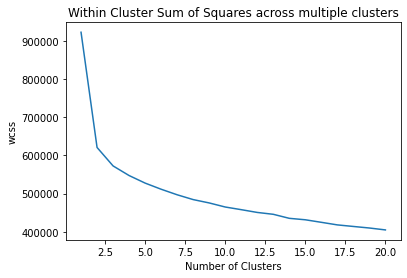

In [31]:
plt.plot(range(1,21),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('Within Cluster Sum of Squares across multiple clusters')

K Means with 7 clusters

In [36]:
kmeans=KMeans(n_clusters=7)
kmeans.fit(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [38]:
df['clusters']=kmeans.labels_

<Axes: >

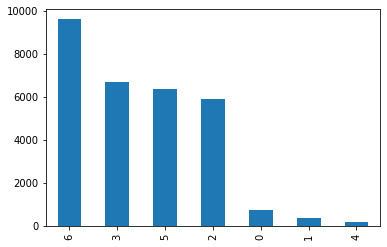

In [40]:
df['clusters'].value_counts().plot(kind='bar')

In [43]:
from sklearn.metrics import silhouette_score

In [47]:
print(silhouette_score(df.iloc[:,0:-1],labels=df['clusters']))

0.13084610075220363


In [51]:
df.groupby(['clusters'])['Gender'].sum()

clusters
0      48
1      87
2    1069
3    1242
4      45
5    1141
6    1590
Name: Gender, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  30000 non-null  int64
 1   Orders                  30000 non-null  int64
 2   Jordan                  30000 non-null  int64
 3   Gatorade                30000 non-null  int64
 4   Samsung                 30000 non-null  int64
 5   Asus                    30000 non-null  int64
 6   Udis                    30000 non-null  int64
 7   Mondelez International  30000 non-null  int64
 8   Wrangler                30000 non-null  int64
 9   Vans                    30000 non-null  int64
 10  Fila                    30000 non-null  int64
 11  Brooks                  30000 non-null  int64
 12  H&M                     30000 non-null  int64
 13  Dairy Queen             30000 non-null  int64
 14  Fendi                   30000 non-null  int64
 15  Hewlett Packard    